# El data set de MNIST

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("official/mnist/dataset.py", one_hot=True)

Extracting official/mnist/dataset.py\train-images-idx3-ubyte.gz
Extracting official/mnist/dataset.py\train-labels-idx1-ubyte.gz
Extracting official/mnist/dataset.py\t10k-images-idx3-ubyte.gz
Extracting official/mnist/dataset.py\t10k-labels-idx1-ubyte.gz


In [5]:
len(mnist.train.images)

55000

In [6]:
len(mnist.test.images)

10000

In [8]:
im_temp = mnist.train.images[0]
im_temp

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
from skimage import io
import numpy as np

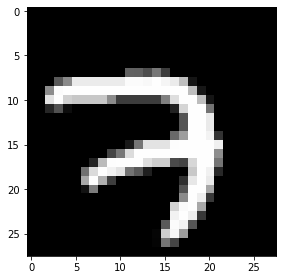

In [13]:
io.imshow(np.reshape(im_temp,(28,28)))

In [14]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Una red neuronal con Tensor Flow - v1
* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión 784
* EL dataset se puede pensar como 55000 filas y 784 columnas.
* Cada dato del dataset es un número real entre 0 y 1

Y=softmax(W*x+b)

In [18]:
dim_imput= 784
n_categories = 10

In [19]:
x = tf.placeholder(tf.float32, [None, dim_imput])


In [17]:
W = tf.Variable(tf.zeros([dim_imput,n_categories]))
b = tf.Variable(tf.zeros([n_categories]))

In [20]:
softmax_args = tf.matmul(x,W) + b
y_hat = tf.nn.softmax(softmax_args)

#### Entrenando la red neuronal

* Los/ Cost <- objetivo minimizar las pérdidas

In [21]:
from IPython.display import display, Math,Latex

In [25]:
display(Math(r"H_{y'}(y) = -\sum_{i} y_i' log(\hat{y_i})"))

<IPython.core.display.Math object>

In [23]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [27]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1]))


In [26]:
#tf.nn.softmax_corrs_entropy_with_logits(softmax_args, y_)

In [29]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [30]:
session = tf.InteractiveSession()

In [31]:
tf.global_variables_initializer().run()

In [33]:
for _ in range(5000):
    batch_x, batch_y = mnist.train.next_batch(100)
    session.run(train_step, feed_dict={x: batch_x, y_: batch_y})

#### Evaluando la red neuronal

In [35]:
correct_predictions = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_,1))

In [36]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [37]:
print(session.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9242
